# **"Absorption correction routines for multiple samples with arbitrary shapes.**
#### The documentation can be found at: https://arxiv.org/abs/2410.08313
#### The absorption correction program includes predefined samples like cuboids, cylinders, half-cylinders, spheres, etc.

# ----------------------------------------------------------

### **Absorption correction of a cuboid.**


In [1]:
# Download and Install abscorr program
!git clone https://github.com/macsatncnr/abscorrpython
%cd abscorrpython
import numpy as np
import abscorr as abcr
import time

Cloning into 'abscorrpython'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 87.76 KiB | 6.27 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/abscorrpython


In [ ]:
def boxsmpltransm(theta,twotheta,**kwargs):
    """
    Example program to calculate the transmission of a cuboid

    Parameters
    ----------
    theta : float
        theta value
    twotheta : fluat
        twotheta value.

    Returns
    -------
    absorption : fluat
        Calculated transmission given a theta and twotheta value for a sample define as a box.

    """

    s0=[0.0,1.0,0.0]    #   Incident beam
    s=[0.0,1.0,0.0]     #   Scattered beam
    mu_ei=4.0           #   Linear absorption factor for the incident beam in cm^-1
    mu_ef=4.0           #   Linear absorption factor for the scattered beam in cm^-1
    lx=2.0              #   cuboid width lenght and height
    ly=0.5
    lz=2.0
    samplebox=abcr.boxsample(lx,ly,lz)
    ss0=abcr.srotxy(s0,-1*theta)
    ss=abcr.srotxy(abcr.srotxy(s,-1*theta),twotheta)
    transm=abcr.integ(ss0, ss, samplebox,mu_ei,mu_ef)
    print(theta,twotheta,transm)
    if 'file_out' in kwargs:
       file2write=kwargs["file_out"]
       with open(file2write, 'a') as ff:
           np.savetxt(ff,[[theta,twotheta,transm]],fmt='%1.3f',delimiter='\t')

    if 'return_list' in kwargs:
        return_list=kwargs["return_list"]
        return_list.append([theta,twotheta,transm])
    return transm

### **Trans_sample_sequential** receives a two-column list [theta, twotheta] and calls boxsmpltransm to calculate the transmission for each theta-twotheta sample orientation.

In [ ]:
def trans_sample_sequential(angles,**kwargs):
    """
    Calculate the transmssion sequentially giving a list of [theta,twotheta] angles

    Parameters
    ----------

    angles:
                angles :    Two-columns list [theta, twotheta]
                            List with two columns list of floats
                            [theta, twotheta] values to compute transmission.

                            String
                            if  angles is a "string" then angles is a file name
                            with the angles theta_twotheta.
                            The file  must have two columns list of floats  [theta, twotheta]


    **kwargs :  file_out :  file to save the calculated transmission with 3 columns:
                            [theta, twotheta, transmission]

    Returns
    -------
                A list with with three columns [theta, twotheta, transmission]
    """
    startime=time.time()
    if type(angles)==str:
        file2read=angles
        with open(file2read, 'r') as ff:
            angles=np.loadtxt(ff)

    if 'file_out' in kwargs:
       file2write=kwargs["file_out"]
       ff=open(file2write, 'w')
       ff.close()

    transmi=[boxsmpltransm(angle[0],angle[1],**kwargs) for angle in angles]

    print('done.', time.time()-startime)
    return transmi

### **Trans_terst** creates an array of theta and twotheta angles and calls trans_sample_sequential to calculate the transmission.

In [ ]:
def trans_test():
    """
    Calculate the transmission sequentially and save it in the file test_cuboid.txt'
    For multiprocessing open file cuboid_mpt.py
    """
    range_theta=[0,360,5]        # Range of theta angles [min, max, steps]
    range_twotheta=[0,180,5]     # Range of two theta angles [min, max, steps]
    angles=abcr.generate_Sample_theta_2theta(range_theta, range_twotheta)
    file_out='test_cuboid.txt'  # file to save thge results
    trans_sample_sequential(angles,file_out=file_out)

### Plot the transmission.

In [ ]:
def plot_transmission():
    abcr.generate_contour_plot("test_cuboid.txt")

### Call trans_test and plot_transmission

done. 1207.7110979557037
(648, 3)


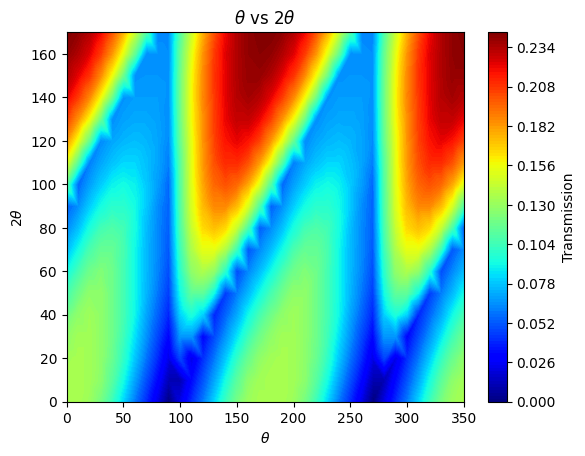

In [ ]:
trans_test()
plot_transmission()

Download file.

In [ ]:
from google.colab import files
files.download("test_cuboid.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>